## Flight Price Prediction(EDA + Feature Engineering)

In [2]:
## Dataset: https://github.com/krishnaik06/5-Days-Live-EDA-and-Feature-Engineering/tree/main/Flight%20Prediction

Project Title: Flight Fare Prediction using Machine Learning

Objective:
To build a machine learning model that accurately predicts flight prices based on various features such as airline, route, flight duration, and other details.

Key Features:

Dataset: Collected flight fare data, which includes attributes like the airline, source, destination, stops, route, flight duration, and additional information.
Target Variable: Flight prices (continuous variable).
Steps Involved:

Data Preprocessing and Feature Engineering:

Handled missing values, data types, and outliers.
Extracted useful time-based features from the date, departure, and arrival columns (e.g., day, month, hour).
Applied label encoding and one-hot encoding to categorical variables, including airline, source, destination, etc.
Removed unnecessary features like 'Route' and handled categorical feature transformations to make the data model-ready.
Model Selection and Training:

Tried various models including Random Forest Regressor, XGBoost, Linear Regression, and Gradient Boosting Regressor.
Conducted hyperparameter tuning for the Random Forest and XGBoost models using cross-validation and grid search.
Split the data into training and validation sets to assess model performance.
Model Evaluation:

Used Root Mean Squared Error (RMSE) as the primary evaluation metric.
Achieved the following RMSE scores:
Random Forest (Tuned): 1589.73
XGBoost: 1202.60
Linear Regression: 2514.06
Gradient Boosting: 1513.41
Conclusion:

The XGBoost model performed the best with the lowest RMSE of 1202.60, making it the optimal choice for flight fare prediction in this dataset.
Random Forest and Gradient Boosting also showed competitive results, with RMSE values of 1589.73 and 1513.41, respectively.
Linear Regression underperformed in comparison, with a higher RMSE of 2514.06, indicating that more complex models capture the relationships in the data more effectively.
Feature Importance:

Feature importance analysis revealed that flight duration was the most significant predictor of flight prices, followed by features like date, additional information (in-flight meal included or not), and specific airlines.
Key Learning Outcomes:

Improved understanding of regression techniques and hyperparameter tuning.
Gained hands-on experience in feature engineering and model evaluation.
Learned to work with complex, real-world datasets, handle categorical variables, and draw insights from feature importance.
Final Summary for Resume:

Flight Fare Prediction (Machine Learning Project)

Developed a machine learning model to predict flight fares using Random Forest, XGBoost, and other algorithms.
Achieved a minimum RMSE of 1202.60 using XGBoost, after fine-tuning model hyperparameters and conducting feature engineering.
Applied techniques like label encoding, one-hot encoding, and grid search cross-validation for optimal performance.
Gained expertise in handling large datasets, building regression models, and drawing insights from feature importance.

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df=pd.read_excel('Data_Train.xlsx')
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df=pd.read_excel('Test_set.xlsx')
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [78]:
# final_df=train_df.append(test_df)
# final_df.head()

# final_df = pd.concat([train_df, test_df], ignore_index=True)
# final_df.head()


In [79]:
train_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [80]:
test_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [81]:
# final_df.info()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [83]:
train_df['Date_of_Journey'].str.split('/').str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [84]:
test_df['Date_of_Journey'].str.split('/').str[0]

0        6
1       12
2       21
3       21
4       24
        ..
2666     6
2667    27
2668     6
2669     6
2670    15
Name: Date_of_Journey, Length: 2671, dtype: object

In [86]:
##Fetaure Engineering Process
train_df['Date']=train_df['Date_of_Journey'].str.split('/').str[0]
train_df['Month']=train_df['Date_of_Journey'].str.split('/').str[1]
train_df['Year']=train_df['Date_of_Journey'].str.split('/').str[2]

In [87]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


In [88]:
##Fetaure Engineering Process
test_df['Date']=test_df['Date_of_Journey'].str.split('/').str[0]
test_df['Month']=test_df['Date_of_Journey'].str.split('/').str[1]
test_df['Year']=test_df['Date_of_Journey'].str.split('/').str[2]

In [89]:
test_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,06,2019
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,05,2019


In [10]:
# df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
# df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
# df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [90]:
train_df['Date']=train_df['Date'].astype(int)
train_df['Month']=train_df['Month'].astype(int)
train_df['Year']=train_df['Year'].astype(int)

In [91]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [93]:
train_df.drop('Date_of_Journey',axis=1,inplace=True)

In [94]:
train_df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
5,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,2019


In [95]:
test_df['Date']=test_df['Date'].astype(int)
test_df['Month']=test_df['Month'].astype(int)
test_df['Year']=test_df['Year'].astype(int)

In [96]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
 10  Date             2671 non-null   int64 
 11  Month            2671 non-null   int64 
 12  Year             2671 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 271.4+ KB


In [98]:
test_df.drop('Date_of_Journey',axis=1,inplace=True)

In [99]:
test_df.head(10)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,2019
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,2019
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,2019
5,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included,12,6,2019
6,Air India,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info,12,3,2019
7,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info,1,5,2019
8,IndiGo,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info,15,3,2019
9,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info,18,5,2019


In [100]:
train_df['Arrival_Time'].str.split(' ').str[0]

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [107]:
test_df['Arrival_Time'].str.split(' ').str[0]

0       04:25
1       10:20
2       19:00
3       21:00
4       02:45
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 2671, dtype: object

In [101]:
train_df['Arrival_Time']=train_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [108]:
test_df['Arrival_Time']=test_df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

In [102]:
train_df['Arrival_hour']=train_df['Arrival_Time'].str.split(':').str[0]
train_df['Arrival_min']=train_df['Arrival_Time'].str.split(':').str[1]

In [109]:
test_df['Arrival_hour']=test_df['Arrival_Time'].str.split(':').str[0]
test_df['Arrival_min']=test_df['Arrival_Time'].str.split(':').str[1]

In [103]:
train_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10


In [110]:
test_df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1 stop,No info,6,6,2019,04,25


In [104]:
train_df['Arrival_hour']=train_df['Arrival_hour'].astype(int)
train_df['Arrival_min']=train_df['Arrival_min'].astype(int)

In [111]:
test_df['Arrival_hour']=test_df['Arrival_hour'].astype(int)
test_df['Arrival_min']=test_df['Arrival_min'].astype(int)

In [105]:
train_df.drop('Arrival_Time',axis=1,inplace=True)

In [112]:
test_df.drop('Arrival_Time',axis=1,inplace=True)

In [106]:
train_df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [113]:
test_df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,10h 55m,1 stop,No info,6,6,2019,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,4h,1 stop,No info,12,5,2019,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,23h 45m,1 stop,In-flight meal not included,21,5,2019,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,13h,1 stop,No info,21,5,2019,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,2h 50m,non-stop,No info,24,6,2019,2,45


In [114]:
train_df['Dept_hour']=train_df['Dep_Time'].str.split(':').str[0]
train_df['Dept_min']=train_df['Dep_Time'].str.split(':').str[1]
train_df['Dept_hour']=train_df['Dept_hour'].astype(int)
train_df['Dept_min']=train_df['Dept_min'].astype(int)
train_df.drop('Dep_Time',axis=1,inplace=True)

In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Arrival_hour     10683 non-null  int64 
 12  Arrival_min      10683 non-null  int64 
 13  Dept_hour        10683 non-null  int64 
 14  Dept_min         10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [116]:
test_df['Dept_hour']=test_df['Dep_Time'].str.split(':').str[0]
test_df['Dept_min']=test_df['Dep_Time'].str.split(':').str[1]
test_df['Dept_hour']=test_df['Dept_hour'].astype(int)
test_df['Dept_min']=test_df['Dept_min'].astype(int)
test_df.drop('Dep_Time',axis=1,inplace=True)

In [117]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Source           2671 non-null   object
 2   Destination      2671 non-null   object
 3   Route            2671 non-null   object
 4   Duration         2671 non-null   object
 5   Total_Stops      2671 non-null   object
 6   Additional_Info  2671 non-null   object
 7   Date             2671 non-null   int64 
 8   Month            2671 non-null   int64 
 9   Year             2671 non-null   int64 
 10  Arrival_hour     2671 non-null   int64 
 11  Arrival_min      2671 non-null   int64 
 12  Dept_hour        2671 non-null   int64 
 13  Dept_min         2671 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 292.3+ KB


In [118]:
train_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [119]:
test_df['Total_Stops'].unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [120]:
train_df['Total_Stops']=train_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [122]:
test_df['Total_Stops']=train_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [124]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [128]:
# Drop the row with index 9039
train_df.drop(index=9039, inplace=True)

# Check if the row is successfully dropped
train_df.reset_index(drop=True, inplace=True)  # Optional: reset index for cleaner output
train_df.tail()  # Display the last few rows to confirm the drop


,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
10677,Air Asia,Kolkata,Banglore,2h 30m,0.0,No info,4107,9,4,2019,22,25,19,55
10678,Air India,Kolkata,Banglore,2h 35m,0.0,No info,4145,27,4,2019,23,20,20,45
10679,Jet Airways,Banglore,Delhi,3h,0.0,No info,7229,27,4,2019,11,20,8,20
10680,Vistara,Banglore,New Delhi,2h 40m,0.0,No info,12648,1,3,2019,14,10,11,30
10681,Air India,Delhi,Cochin,8h 20m,2.0,No info,11753,9,5,2019,19,15,10,55


In [129]:
train_df[train_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min


In [126]:
train_df.drop('Route',axis=1,inplace=True)

In [127]:
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50


In [125]:
test_df[test_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,NaN,No info,6,6,2019,4,25,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,NaN,No info,12,5,2019,10,20,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,NaN,In-flight meal not included,21,5,2019,19,0,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,NaN,No info,21,5,2019,21,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,NaN,No info,24,6,2019,2,45,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,NaN,No info,6,6,2019,20,25,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,NaN,No info,27,3,2019,16,55,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,NaN,No info,6,3,2019,4,25,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,NaN,No info,6,3,2019,19,15,4,0


In [130]:
# Assign the value 3 for rows 0, 1, 2, 3
test_df.loc[[0, 1, 2, 3], 'Total_Stops'] = 3

# Assign the value 2 for row 4
test_df.loc[4, 'Total_Stops'] = 2

# Assign the value 3 for rows 2666, 2668, 2669, 2670
test_df.loc[[2666, 2668, 2669, 2670], 'Total_Stops'] = 3

# Assign the value 2 for row 2667
test_df.loc[2667, 'Total_Stops'] = 2

# Check to confirm the changes
test_df.loc[[0, 1, 2, 3, 4, 2666, 2667, 2668, 2669, 2670], ['Total_Stops']]


,Total_Stops
0,3.0
1,3.0
2,3.0
3,3.0
4,2.0
2666,3.0
2667,2.0
2668,3.0
2669,3.0
2670,3.0


In [131]:
test_df[test_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
5,Jet Airways,Delhi,Cochin,DEL → BOM → COK,18h 20m,NaN,In-flight meal not included,12,6,2019,12,35,18,15
6,Air India,Banglore,New Delhi,BLR → TRV → DEL,15h 5m,NaN,No info,12,3,2019,22,35,7,30
7,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,5h 15m,NaN,No info,1,5,2019,20,30,15,15
8,IndiGo,Kolkata,Banglore,CCU → BLR,2h 45m,NaN,No info,15,3,2019,12,55,10,10
9,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,6h 5m,NaN,No info,18,5,2019,22,35,16,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,33h 15m,NaN,No info,27,3,2019,4,25,19,10
2662,Air India,Mumbai,Hyderabad,BOM → HYD,1h 30m,NaN,No info,21,5,2019,15,25,13,55
2663,GoAir,Kolkata,Banglore,CCU → BOM → BLR,8h 15m,NaN,No info,12,5,2019,7,45,23,30
2664,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,10h 15m,NaN,No info,15,6,2019,1,30,15,15


In [132]:
train_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [133]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Duration         10682 non-null  object 
 4   Total_Stops      10682 non-null  float64
 5   Additional_Info  10682 non-null  object 
 6   Price            10682 non-null  int64  
 7   Date             10682 non-null  int64  
 8   Month            10682 non-null  int64  
 9   Year             10682 non-null  int64  
 10  Arrival_hour     10682 non-null  int64  
 11  Arrival_min      10682 non-null  int64  
 12  Dept_hour        10682 non-null  int64  
 13  Dept_min         10682 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 1.1+ MB


In [134]:
train_df['duration_hour']=train_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [135]:
train_df[train_df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327,6,3,2019,16,55,16,50,5m


In [136]:
train_df.drop(6474,axis=0,inplace=True)

In [137]:
train_df[train_df['duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour


In [138]:
test_df['duration_hour']=test_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [139]:
test_df[test_df['duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,NaN,No info,12,3,2019,16,55,16,50,5m


In [140]:
test_df.drop(2660,axis=0,inplace=True)

In [141]:
test_df[test_df['duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour


In [142]:
# final_df['duration_hour']=final_df['duration_hour'].astype('int')

# Handling cases where duration is only in minutes (e.g., '50m')
train_df['duration_hour'] = train_df['Duration'].apply(lambda x: x.split('h')[0] if 'h' in x else '0')

# Remove any 'm' left in the duration_hour
train_df['duration_hour'] = train_df['duration_hour'].str.replace('m', '')

# Convert to integer
train_df['duration_hour'] = train_df['duration_hour'].astype(int)


In [143]:
train_df.drop('Duration',axis=1,inplace=True)

In [144]:
train_df.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,10,22,20,2


In [145]:
# final_df['duration_hour']=final_df['duration_hour'].astype('int')

# Handling cases where duration is only in minutes (e.g., '50m')
test_df['duration_hour'] = test_df['Duration'].apply(lambda x: x.split('h')[0] if 'h' in x else '0')

# Remove any 'm' left in the duration_hour
test_df['duration_hour'] = test_df['duration_hour'].str.replace('m', '')

# Convert to integer
test_df['duration_hour'] = test_df['duration_hour'].astype(int)


In [146]:
test_df.drop('Duration',axis=1,inplace=True)

In [147]:
test_df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,3.0,No info,6,6,2019,4,25,17,30,10


In [149]:
train_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [150]:
test_df['Airline'].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [152]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [ ]:
train_df['Airline']=labelencoder.fit_transform(train_df['Airline'])
train_df['Source']=labelencoder.fit_transform(train_df['Source'])
train_df['Destination']=labelencoder.fit_transform(train_df['Destination'])
train_df['Additional_Info']=labelencoder.fit_transform(train_df['Additional_Info'])

In [153]:
train_df.shape

(10681, 14)

In [154]:
train_df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour
0,IndiGo,Banglore,New Delhi,0.0,No info,3897,24,3,2019,1,10,22,20,2
1,Air India,Kolkata,Banglore,2.0,No info,7662,1,5,2019,13,15,5,50,7


In [162]:
train_df[['Airline']]

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo
...,...
10677,Air Asia
10678,Air India
10679,Jet Airways
10680,Vistara


In [165]:
# # ohe.fit_transform(np.array(final_df['Airline']).reshape(-1,1))


# from sklearn.preprocessing import OneHotEncoder

# # Initialize OneHotEncoder
# ohe = OneHotEncoder()

# # Apply one-hot encoding to the 'Airline' column
# airline_encoded = ohe.fit_transform(np.array(train_df['Airline']).reshape(-1,1)).toarray()

# # Check the shape of the encoded data
# print(airline_encoded.shape)


In [163]:
# pd.get_dummies(train_df,columns=["Airline", "Source", "Destination"] ,drop_first = True)

# Apply one-hot encoding to categorical columns 'Airline', 'Source', 'Destination', 'Additional_Info'
train_df_encoded = pd.get_dummies(train_df, columns=["Airline", "Source", "Destination", "Additional_Info"], drop_first=True)

# Check the first few rows of the encoded dataframe
train_df_encoded.head()


,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0.0,3897,24,3,2019,1,10,22,20,2,...,True,False,False,False,False,False,False,False,True,False
1,2.0,7662,1,5,2019,13,15,5,50,7,...,False,False,False,False,False,False,False,False,True,False
2,2.0,13882,9,6,2019,4,25,9,25,19,...,False,False,False,False,False,False,False,False,True,False
3,1.0,6218,12,5,2019,23,30,18,5,5,...,False,False,False,False,False,False,False,False,True,False
4,1.0,13302,1,3,2019,21,35,16,50,4,...,True,False,False,False,False,False,False,False,True,False


In [166]:
test_df_encoded = pd.get_dummies(test_df, columns=["Airline", "Source", "Destination", "Additional_Info"], drop_first=True)

test_df_encoded.head()

,Route,Total_Stops,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info
0,DEL → BOM → COK,3.0,6,6,2019,4,25,17,30,10,...,True,False,False,False,False,False,False,False,False,True
1,CCU → MAA → BLR,3.0,12,5,2019,10,20,6,20,4,...,False,False,False,False,False,False,False,False,False,True
2,DEL → BOM → COK,3.0,21,5,2019,19,0,19,15,23,...,True,False,False,False,False,False,False,True,False,False
3,DEL → BOM → COK,3.0,21,5,2019,21,0,8,0,13,...,True,False,False,False,False,False,False,False,False,True
4,BLR → DEL,2.0,24,6,2019,2,45,23,55,2,...,False,True,False,False,False,False,False,False,False,True


In [167]:
# Align the test dataset columns with the train dataset
test_df_encoded = test_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)


In [168]:
test_df_encoded.head()

,Total_Stops,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min,duration_hour,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,3.0,0,6,6,2019,4,25,17,30,10,...,False,0,0,False,False,False,0,False,True,0
1,3.0,0,12,5,2019,10,20,6,20,4,...,False,0,0,False,False,False,0,False,True,0
2,3.0,0,21,5,2019,19,0,19,15,23,...,False,0,0,False,False,True,0,False,False,0
3,3.0,0,21,5,2019,21,0,8,0,13,...,False,0,0,False,False,False,0,False,True,0
4,2.0,0,24,6,2019,2,45,23,55,2,...,False,0,0,False,False,False,0,False,True,0


In [164]:
# Check for missing values in the dataset
train_df.isnull().sum()


Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Arrival_hour       0
Arrival_min        0
Dept_hour          0
Dept_min           0
duration_hour      0
dtype: int64

In [169]:
test_df.isnull().sum()

Airline               0
Source                0
Destination           0
Route                 0
Total_Stops        2660
Additional_Info       0
Date                  0
Month                 0
Year                  0
Arrival_hour          0
Arrival_min           0
Dept_hour             0
Dept_min              0
duration_hour         0
dtype: int64

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'Price' is the target column and train_df_encoded contains the full feature set
X = train_df_encoded.drop('Price', axis=1)
y = train_df_encoded['Price']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to ensure the split is correct
print(f"Training data shape: {X_train.shape}, Validation data shape: {X_val.shape}")


Training data shape: (8544, 38), Validation data shape: (2137, 38)


Train a Random Forest Regressor

In [171]:
# Initialize the RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate the RMSE (Root Mean Squared Error)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
print(f"Validation RMSE: {rmse:.2f}")


Validation RMSE: 1593.88


In [172]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and compute the RMSE for each fold
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)
print(f"Cross-validated RMSE: {cv_rmse.mean():.2f}")


Cross-validated RMSE: 1481.84


In [173]:
# Train on the entire training dataset
model.fit(X, y)

# Predict on the test dataset
test_predictions = model.predict(test_df_encoded.drop('Price', axis=1, errors='ignore'))

# Check the predictions
print(test_predictions)

# or we should proceed w the training of other models like xgboost or linear regression as mentioned and why and then compare performances?


[13309.93 12604.91 12765.02 ... 19249.45 12018.3  11911.5 ]


In [174]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                               n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Print the best parameters found
print(f"Best Parameters: {rf_random.best_params_}")

# Predict using the tuned model
tuned_predictions = rf_random.predict(X_val)

# Calculate new RMSE
tuned_mse = mean_squared_error(y_val, tuned_predictions)
tuned_rmse = np.sqrt(tuned_mse)
print(f"Tuned Validation RMSE: {tuned_rmse:.2f}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
Tuned Validation RMSE: 1589.73


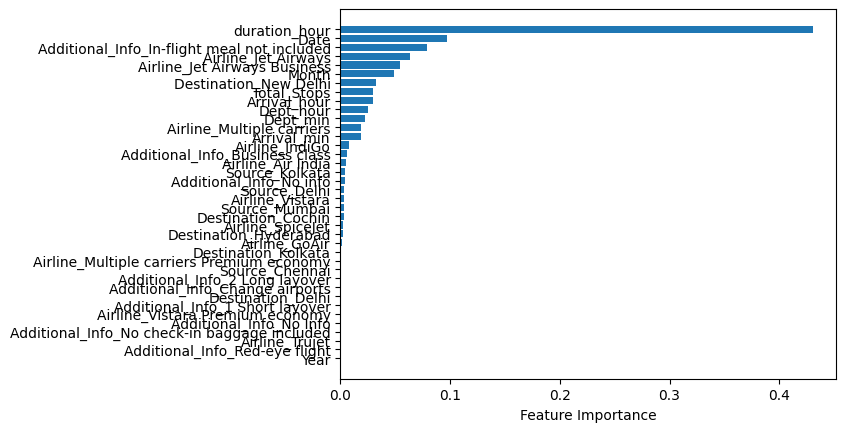

In [175]:
# Get feature importance
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
import matplotlib.pyplot as plt

plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()


In [200]:
print(y_train)

10610     4050
1034      5583
8123     10262
4779     12681
3207      6218
         ...  
5734     12242
5191     10844
5390      7670
860       6144
7271      5678
Name: Price, Length: 8544, dtype: int64


In [205]:
y_train.head()

10610     4050
1034      5583
8123     10262
4779     12681
3207      6218
Name: Price, dtype: int64

In [201]:
print(y_train.info())

<class 'pandas.core.series.Series'>
Index: 8544 entries, 10610 to 7271
Series name: Price
Non-Null Count  Dtype
--------------  -----
8544 non-null   int64
dtypes: int64(1)
memory usage: 133.5 KB
None


In [206]:
y_train.head().to_string(index=False)

' 4050\n 5583\n10262\n12681\n 6218'

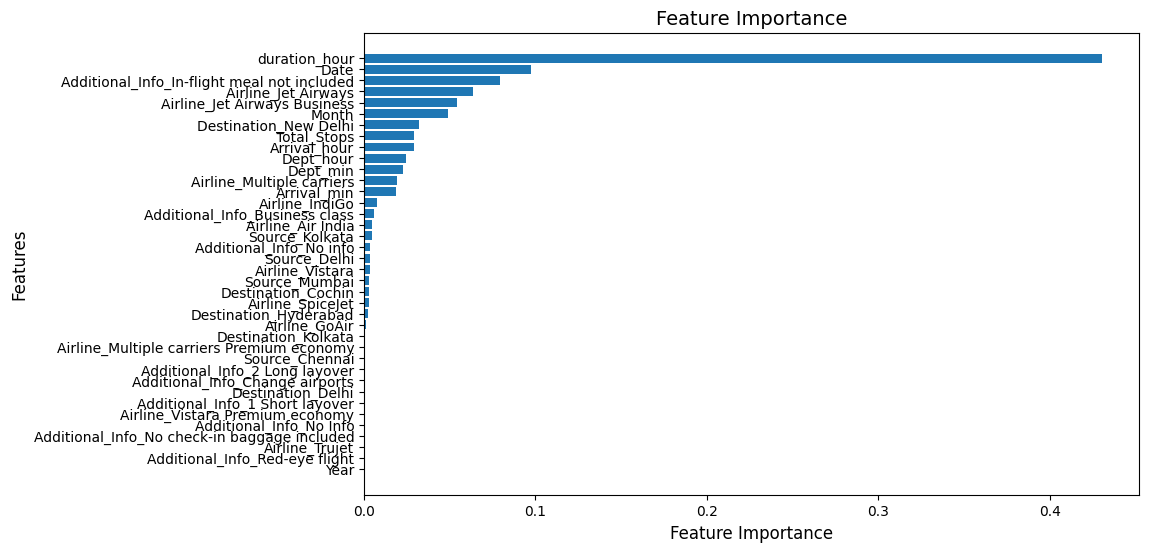

In [177]:
import matplotlib.pyplot as plt

# Resize the figure and increase the label size
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed (width, height)
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx])

# Set label sizes and rotations
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Feature Importance", fontsize=14)
plt.show()


In [176]:
from xgboost import XGBRegressor

# Initialize the XGBoost regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the validation set
xgb_predictions = xgb_model.predict(X_val)

# Calculate the RMSE for XGBoost
xgb_mse = mean_squared_error(y_val, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
print(f"XGBoost Validation RMSE: {xgb_rmse:.2f}")


XGBoost Validation RMSE: 1259.44


In [182]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor()

# Define the parameter grid for tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
}

# Grid Search Cross-validation for XGBoost
xgb_cv = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
xgb_cv.fit(X_train, y_train)

# Best parameters and predictions
best_xgb = xgb_cv.best_estimator_
y_pred_xgb = best_xgb.predict(X_val)

# RMSE for XGBoost
# rmse_xgb = mean_squared_error(y_val, y_pred_xgb, squared=False)
# print(f"XGBoost RMSE: {rmse_xgb}")
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)  # Manually take the square root to get RMSE
print(f"XGBoost RMSE: {rmse_xgb}")

Fitting 3 folds for each of 324 candidates, totalling 972 fits
XGBoost RMSE: 1202.5985926318058


In [189]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train Gradient Boosting model
gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3, random_state=0)
gbr.fit(X_train, y_train)

# Predictions
y_pred_gbr = gbr.predict(X_val)

# MSE for Gradient Boosting
mse_gbr = mean_squared_error(y_val, y_pred_gbr)

# Manually take square root to get RMSE
rmse_gbr = np.sqrt(mse_gbr)
print(f"Gradient Boosting RMSE: {rmse_gbr}")


Gradient Boosting RMSE: 1513.4146708966275


In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_val)

# MSE for Linear Regression
mse_lr = mean_squared_error(y_val, y_pred_lr)

# Manually take square root to get RMSE
rmse_lr = np.sqrt(mse_lr)
print(f"Linear Regression RMSE: {rmse_lr}")


Linear Regression RMSE: 2514.0611876132302


In [190]:
print(f"Random Forest Tuned RMSE: {tuned_rmse}")
print(f"XGBoost RMSE: {rmse_xgb}")
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Gradient Boosting RMSE: {rmse_gbr}")


Random Forest Tuned RMSE: 1589.725661359697
XGBoost RMSE: 1202.5985926318058
Linear Regression RMSE: 2514.0611876132302
Gradient Boosting RMSE: 1513.4146708966275


Re-training xgboost on the entire training dataset. 

In [ ]:
import pandas as pd

# Assuming you used pandas get_dummies for encoding
X_test_encoded = pd.get_dummies(X_test)

# Align the columns of the test set with the train set
X_test_encoded = X_test_encoded.reindex(columns=X_train.columns, fill_value=0)


In [ ]:
# Predict on the encoded test dataset
y_pred_test = best_xgb.predict(X_test_encoded)
# Display the predictions
print("Predicted Flight Prices (Test Set):")
print(y_pred_test)


Predicted Flight Prices (Test Set):
[11753.27 11753.27 11753.27 ... 11753.27 11753.27 11753.27]


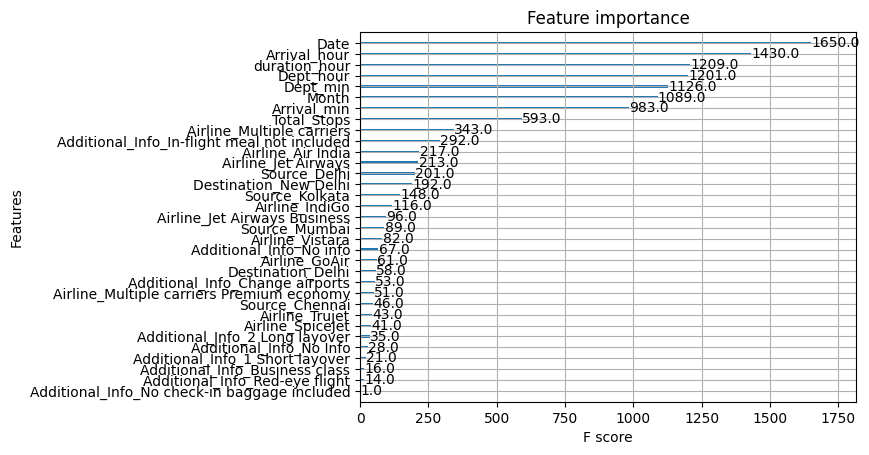

In [195]:
# Check feature importance
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(best_xgb)
plt.show()
